In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
from torchsummary import summary
from torch import nn
import pandas as pd
%matplotlib inline

In [2]:
torch.manual_seed(2)

In [3]:
n_points = 100
centers = [(-0.5,0.5),(0.5,-0.5)]
X, y = datasets.make_blobs(n_samples=n_points,centers=centers,cluster_std=0.4,random_state=123,)

In [4]:
data_df = np.column_stack((X, y))
df = pd.DataFrame(data_df, columns = ['X1', 'X2', 'Label'])
df.head()

,X1,X2,Label
0,-0.137158,-0.071472,0.0
1,0.804380,-0.370612,1.0
2,-0.602248,-0.619436,0.0
3,0.570877,-0.511987,1.0
4,0.006375,0.153304,0.0


In [5]:
df_lbl0 = df[df['Label'] == 0]
df_lbl1 = df[df['Label'] == 1]

In [6]:
def scatter_plot():
    plt.scatter(df_lbl0['X1'], df_lbl0['X2'])
    plt.scatter(df_lbl1['X1'], df_lbl1['X2'])
    plt.show()

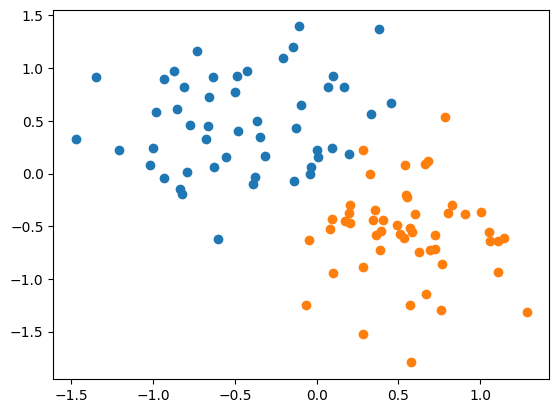

In [7]:
scatter_plot()

In [8]:
class Model(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(in_features = input_size, out_features = output_size)

    def forward(self, X):
        pred = torch.sigmoid(self.linear(X))
        return pred

    def predict(self, X):
        return '1' if self.forward(X) >= 0.5 else '0'

In [9]:
model = Model(input_size = 2, output_size = 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683]], requires_grad=True), Parameter containing:
tensor([0.1939], requires_grad=True)]


In [10]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[ 0.1622, -0.1683]])),
             ('linear.bias', tensor([0.1939]))])

In [11]:
summary(model, (2,))

Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00


Layer (type:depth-idx)                   Output Shape              Param #
├─Linear: 1-1                            [-1, 1]                   3
Total params: 3
Trainable params: 3
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [12]:
def get_parameters():
    [w, b] = model.parameters()
    w1, w2 = w.view(2)
    return w1.item(), w2.item(), b.item() 

In [13]:
def plot_fit(title):
    plt.title(title)
    w1, w2, b1 = get_parameters()
    X1 = np.array([-2.0, 2.0])
    X2 = (w1*X1 + b1 ) / -w2
    plt.plot(X1, X2, 'r')
    scatter_plot()
    plt.show()

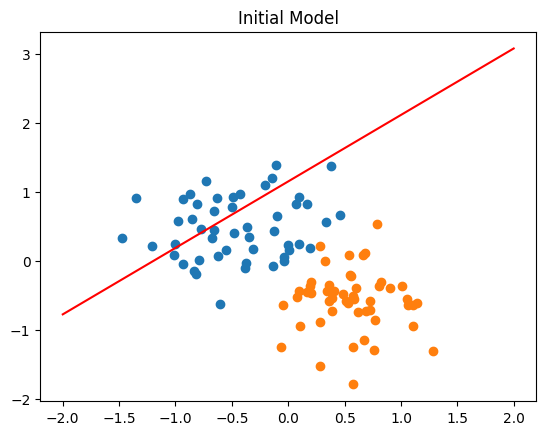

In [14]:
plot_fit('Initial Model')

#### Prepare The Data

In [15]:
X_t = torch.tensor(X, dtype = torch.float32)
y_t = torch.tensor(y, dtype = torch.float32)
dataset = TensorDataset(X_t, y_t)
dataloader = DataLoader(dataset = dataset, shuffle = True, batch_size = 100)

#### Loss , Optimizer

In [16]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

#### Train The Model

In [17]:
EPOCHS = 1000
Lossess = []
for epoch in range(EPOCHS):
    loss = 0
    for x, y in dataloader:
        y_pred = model.forward(x)
        loss = criterion(y_pred, y.view(-1,1))
        Lossess.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f' Epoch : {epoch} , loss : {loss} ')
        

 Epoch : 0 , loss : 0.6185115575790405 
 Epoch : 1 , loss : 0.6174640655517578 
 Epoch : 2 , loss : 0.6164200305938721 
 Epoch : 3 , loss : 0.6153795123100281 
 Epoch : 4 , loss : 0.6143423914909363 
 Epoch : 5 , loss : 0.6133086681365967 
 Epoch : 6 , loss : 0.612278401851654 
 Epoch : 7 , loss : 0.6112514734268188 
 Epoch : 8 , loss : 0.6102280020713806 
 Epoch : 9 , loss : 0.6092079281806946 
 Epoch : 10 , loss : 0.6081911325454712 
 Epoch : 11 , loss : 0.6071776747703552 
 Epoch : 12 , loss : 0.6061676740646362 
 Epoch : 13 , loss : 0.6051608920097351 
 Epoch : 14 , loss : 0.6041575074195862 
 Epoch : 15 , loss : 0.6031574010848999 
 Epoch : 16 , loss : 0.6021605730056763 
 Epoch : 17 , loss : 0.6011670231819153 
 Epoch : 18 , loss : 0.6001767516136169 
 Epoch : 19 , loss : 0.5991897583007812 
 Epoch : 20 , loss : 0.5982059836387634 
 Epoch : 21 , loss : 0.5972253680229187 
 Epoch : 22 , loss : 0.5962480306625366 
 Epoch : 23 , loss : 0.5952739119529724 
 Epoch : 24 , loss : 0.5943

In [18]:
len(Lossess)

1000

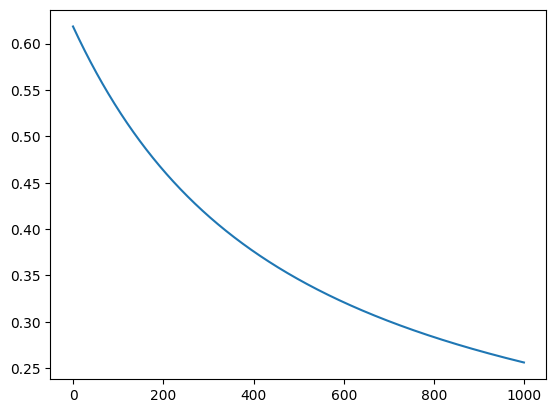

In [19]:
plt.plot(range(EPOCHS), Lossess)
plt.show()

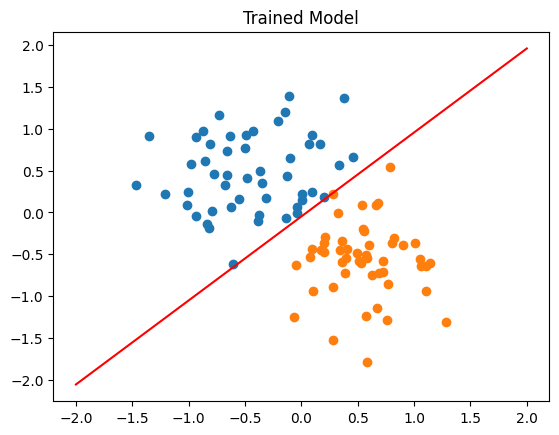

In [20]:
plot_fit('Trained Model')

#### Test The Model

red point positive propbability 0.05055497586727142
black point positive propbability 0.9424158334732056
red point in class 0
black point in class  1


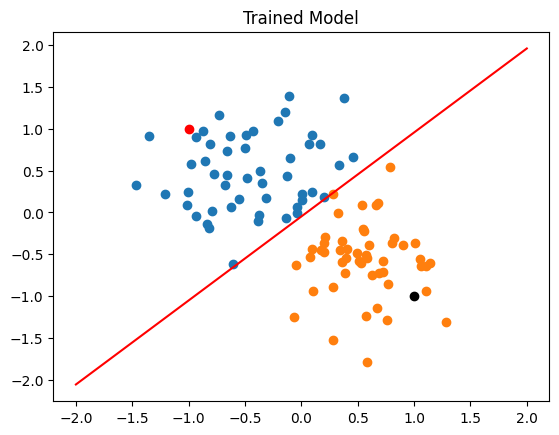

In [21]:
point1 = torch.tensor([-1.0, 1.0])
point2 = torch.tensor([1.0, -1.0])
plt.plot(point1.numpy()[0], point1.numpy()[1], 'ro')
plt.plot(point2.numpy()[0], point2.numpy()[1], 'ko')

print(f'red point positive propbability {model.forward(point1).item()}')
print(f'black point positive propbability {model.forward(point2).item()}')

print(f'red point in class {model.predict(point1)}')
print(f'black point in class  {model.predict(point2)}')


plot_fit('Trained Model')